In [27]:
import torch
import matplotlib.pyplot as plt
import cv2
import torch.nn.functional as F
from feature_extractor import FeatureExtractor
import numpy as np
import time
from cascade import CascadeClassifier
import os
from PIL import Image

In [28]:
torch.cuda.is_available()

True

['old/originalPics/img_591.jpg', 'old/originalPics/img_1024.jpg', 'old/originalPics/img_1189.jpg', 'old/originalPics/img_114.jpg']


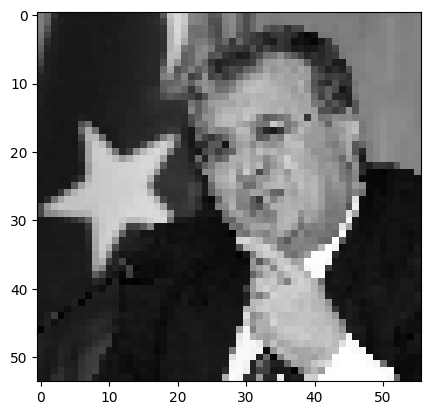

(54, 56)
torch.Size([54, 56])
torch.Size([54, 56])
torch.Size([1, 1, 12, 13, 19, 19])
torch.Size([1, 1, 12, 13, 19, 19])
torch.Size([1, 1, 12, 13, 19, 19])


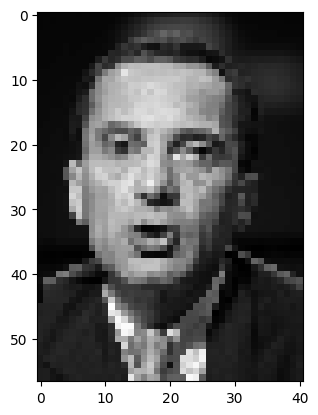

(57, 41)
torch.Size([57, 41])
torch.Size([57, 41])
torch.Size([1, 1, 13, 8, 19, 19])
torch.Size([1, 1, 13, 8, 19, 19])
torch.Size([1, 1, 13, 8, 19, 19])


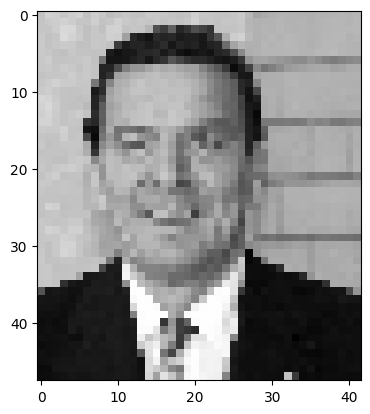

(48, 42)
torch.Size([48, 42])
torch.Size([48, 42])
torch.Size([1, 1, 10, 8, 19, 19])
torch.Size([1, 1, 10, 8, 19, 19])
torch.Size([1, 1, 10, 8, 19, 19])


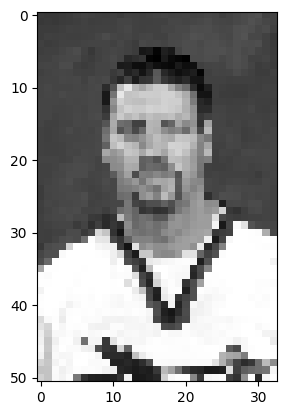

(51, 33)
torch.Size([51, 33])
torch.Size([51, 33])
torch.Size([1, 1, 11, 5, 19, 19])
torch.Size([1, 1, 11, 5, 19, 19])
torch.Size([1, 1, 11, 5, 19, 19])


In [29]:
imgs_path = 'old/originalPics/'
img_names = os.listdir(imgs_path)
for i in range(len(img_names)):
    img_names[i] = imgs_path + img_names[i]
print(img_names)
folds = []
for i in range(len(img_names)):
    img = cv2.imread(img_names[i], cv2.IMREAD_GRAYSCALE)
    # img=  cv2.imread('old/originalPics/img_591.jpg', cv2.IMREAD_GRAYSCALE)
    ws = (150, 150) # window size
    ss = (25, 25) # stride
    tt = (19, 19) # target size
    dim1 = int(img.shape[0] / ws[0] * tt[0])
    dim2 = int(dim1 * img.shape[1] / img.shape[0])
            
    # img = cv2.resize(img, (int(img.shape[0] / ws[0] * tt[0]), int(img.shape[1] / ws[1] * tt[1])))
    # resize with aspect ratio preserved
    # img = cv2.resize(img, (320, int(320 * img.shape[0] / img.shape[1])))
    # img = cv2.resize(img, (320, int(320 * img.shape[0] / img.shape[1])))
    img = cv2.resize(img, (dim2, dim1))
    t = torch.zeros(1, 1, img.shape[0], img.shape[1])
    t[0, 0, 0:img.shape[0], 0:img.shape[1]] = torch.from_numpy(img)
    t = t.cuda()
    plt.imshow(t[0, 0].cpu().numpy(), cmap='gray')
    plt.show()
    # t2 = t.unfold(2, ws[0], ss[0]).unfold(3, ws[1], ss[1])
    f = lambda t: t.unfold(2, tt[0], int(ss[0] / ws[0] * tt[0])).unfold(3, tt[1], int(ss[1] / ws[1] * tt[1]))
    # t2 = t.unfold(2, tt[0], int(ss[0] / ws[0] * tt[0])).unfold(3, tt[1], int(ss[1] / ws[1] * tt[1]))
    row_idx_mat = torch.arange(img.shape[0]).repeat(img.shape[1], 1).t().cuda()
    col_idx_mat = torch.arange(img.shape[1]).repeat(img.shape[0], 1).cuda()
    print(img.shape)
    print(row_idx_mat.shape)
    print(col_idx_mat.shape)

    t2 = f(t)
    folds.append(t2)
    t_row = torch.zeros(1, 1, img.shape[0], img.shape[1])
    t_col = torch.zeros(1, 1, img.shape[0], img.shape[1])
    t_row[0, 0, 0:img.shape[0], 0:img.shape[1]] = row_idx_mat
    t_col[0, 0, 0:img.shape[0], 0:img.shape[1]] = col_idx_mat
    t_row = f(t_row)

    t_col = f(t_col)
    print(t2.shape)
    print(t_row.shape)
    print(t_col.shape)
# resize each subwindow to be 19 * 19
# original t2 is of shape: torch.Size([1, 1, 5, 6, 200, 200])
# t2 = F.interpolate(t2, size=(19, 19), mode='bilinear', align_corners=False)

    # for i in range(t2.shape[2]):
    #     for j in range(t2.shape[3]):
    #         plt.imshow(t2[0, 0, i, j].cpu().numpy(), cmap='gray')
    #         plt.show()

In [30]:
print(row_idx_mat)

tensor([[ 0,  0,  0,  ...,  0,  0,  0],
        [ 1,  1,  1,  ...,  1,  1,  1],
        [ 2,  2,  2,  ...,  2,  2,  2],
        ...,
        [48, 48, 48,  ..., 48, 48, 48],
        [49, 49, 49,  ..., 49, 49, 49],
        [50, 50, 50,  ..., 50, 50, 50]], device='cuda:0')


In [31]:
feature_extractor = FeatureExtractor(shape=(19, 19))
indecies, X = feature_extractor.selectPercentile()
y = np.load('labels.npy')
print(X.shape, y.shape)

(6396, 6977) (6977,)


In [32]:
t3 = t_row[:,:,:,:, 0, 0]
print(t3)
t4 = t_row[:,:,:, :, -1, -1]
print(t4)
t5 = t_col[:,:,:,:, 0, 0]
print(t5)
t6 = t_col[:,:,:, :, -1, -1]
print(t6)

print(t3.shape)

tensor([[[[ 0.,  0.,  0.,  0.,  0.],
          [ 3.,  3.,  3.,  3.,  3.],
          [ 6.,  6.,  6.,  6.,  6.],
          [ 9.,  9.,  9.,  9.,  9.],
          [12., 12., 12., 12., 12.],
          [15., 15., 15., 15., 15.],
          [18., 18., 18., 18., 18.],
          [21., 21., 21., 21., 21.],
          [24., 24., 24., 24., 24.],
          [27., 27., 27., 27., 27.],
          [30., 30., 30., 30., 30.]]]])
tensor([[[[18., 18., 18., 18., 18.],
          [21., 21., 21., 21., 21.],
          [24., 24., 24., 24., 24.],
          [27., 27., 27., 27., 27.],
          [30., 30., 30., 30., 30.],
          [33., 33., 33., 33., 33.],
          [36., 36., 36., 36., 36.],
          [39., 39., 39., 39., 39.],
          [42., 42., 42., 42., 42.],
          [45., 45., 45., 45., 45.],
          [48., 48., 48., 48., 48.]]]])
tensor([[[[ 0.,  3.,  6.,  9., 12.],
          [ 0.,  3.,  6.,  9., 12.],
          [ 0.,  3.,  6.,  9., 12.],
          [ 0.,  3.,  6.,  9., 12.],
          [ 0.,  3.,  6.,  9., 1

In [33]:
s_t = time.time()
# cascadeClassifier= CascadeClassifier(X, y, batchsize=1000, verbose=False, layers=[11, 82, 200], use_stored=False)
cascadeClassifier= CascadeClassifier(X, y, batchsize=1000, verbose=False, layers=[11, 82, 200], use_stored=True)
print(np.sum(y == 1))
print(np.sum(y == 0))
acc = cascadeClassifier.train()
print('accuracy: ', acc)
print('time taken: ', time.time() - s_t, 's')
# save the classifier
# cascadeClassifier.save('cascadeClassifier2.pkl')

2429
4548
Continue training from layer 4 / 3
accuracy:  0.9875304572165687
time taken:  0.42278051376342773 s


Now extracting features from image...
(175, 156)
0


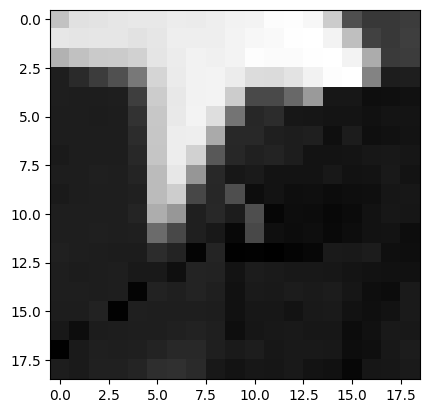

 --------------------------------
Now extracting features from image...
(175, 104)
0


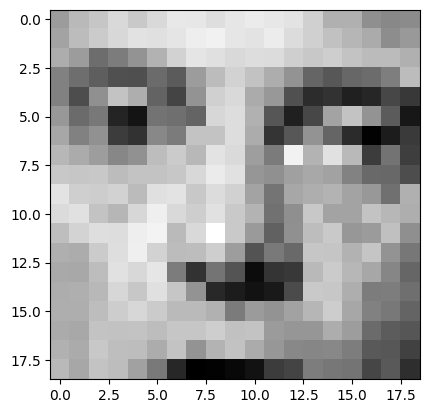

 --------------------------------
Now extracting features from image...
(175, 80)
0


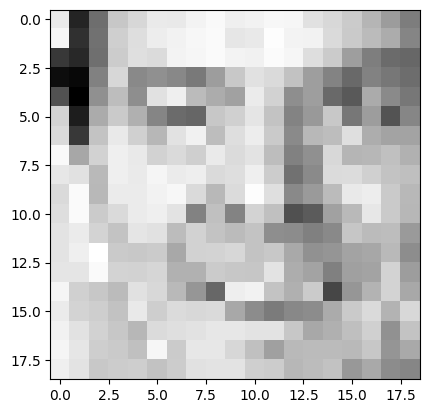

 --------------------------------
Now extracting features from image...
(175, 55)
0


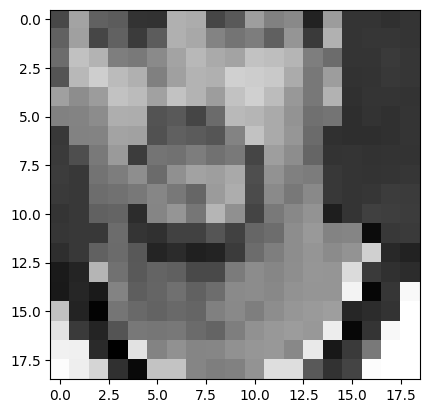

 --------------------------------
time taken:  0.21927785873413086 s


In [34]:
for fold in folds:
    s_t = time.time()
    imgs = fold.reshape(-1, 19, 19)
    # normalize each image
    for i in range(imgs.shape[0]):
        imgs[i] = (imgs[i] - imgs[i].mean()) / imgs[i].std()
    # imgs = torch.from_numpy(imgs).cuda()
    t_f_idx_map, t_features = feature_extractor.extractFeaturesFromImage(imgs,
                                                cascadeClassifier=cascadeClassifier)
    print(t_features.shape)
    predictions = cascadeClassifier.predict(t_features, t_f_idx_map)
    print(np.sum(predictions == 1))
    confidence = cascadeClassifier.confidence(t_features, t_f_idx_map)
    chosen_idx = np.argsort(confidence)[0:1]
    for i in chosen_idx:
        plt.imshow(imgs[i].cpu().numpy(), cmap='gray')
        plt.show()
    print(' --------------------------------')
print('time taken: ', time.time() - s_t, 's')

In [35]:
# np.sum(predictions == 1)